## 第三章：AI 来了——机器学习在交易中的简单应用


### 使用 scikit-learn 演示 KNN 算法在分类问题中的应用


In [121]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [123]:
# 查看数据集的特征名称
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [124]:
# 查看数据集中的样本分类(标签)
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [125]:
# 划分数据集, 元组的第一个数为样本数量，元组的第二个数为特征的数量
X, y = iris.data, iris.target
X.shape

(150, 4)

In [126]:
# 导入数据集拆分工具，并进行数据拆分
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape

(112, 4)

In [127]:
# 创建KNN分类器
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
print("训练集准确率：%.2f" % knn_clf.score(X_train, y_train))
print("训练集准确率：%.2f" % knn_clf.score(X_test, y_test))

训练集准确率：0.96
训练集准确率：0.97


In [128]:
# 使用网格搜索选择最优的参数
from sklearn.model_selection import GridSearchCV

n_neighbors = tuple(range(1, 11, 1))
cv = GridSearchCV(
    estimator=KNeighborsClassifier(), param_grid={"n_neighbors": n_neighbors}, cv=5
)
cv.fit(X, y)
cv.best_params_

{'n_neighbors': 6}

In [129]:
knn_clf = KNeighborsClassifier(n_neighbors=6)
knn_clf.fit(X_train, y_train)
print("训练集准确率 %.2f" % knn_clf.score(X_train, y_train))
print("训练集准确率 %.2f" % knn_clf.score(X_test, y_test))

训练集准确率 0.96
训练集准确率 0.97


### 使用 KNN 算法进行回归预测


In [131]:
# 使用scikit-learn中的波士顿房价数据集训练KNN模型进行房价预测
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [132]:
X, y = data, target
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape

(379, 13)

In [133]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
print("训练模型准确率：%.2f" % knn_reg.score(X_train, y_train))
print("训练模型准确率：%.2f" % knn_reg.score(X_test, y_test))

训练模型准确率：0.67
训练模型准确率：0.53


In [134]:
n_neighbors = tuple(range(1, 21, 1))
cv_reg = GridSearchCV(
    estimator=KNeighborsRegressor(), param_grid={"n_neighbors": n_neighbors}, cv=5
)
cv_reg.fit(X, y)
cv_reg.best_params_

{'n_neighbors': 10}

In [135]:
cv.best_score_

0.9800000000000001

### 使用 KNN 算法预测股票走势

In [136]:
import yfinance as yf

# 获取股票数据
stock_code = "600900.SS"
start_date = "2020-01-01"
end_date = "2024-06-01"
data = yf.download(stock_code, start=start_date, end=end_date)
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,18.469999,18.600000,18.389999,18.469999,16.002626,19128492
2020-01-03,18.500000,18.650000,18.450001,18.570000,16.089268,15438377
2020-01-06,18.540001,18.610001,18.049999,18.200001,15.768694,41550582
2020-01-07,18.219999,18.260000,18.100000,18.190001,15.760033,23210668
2020-01-08,18.049999,18.049999,18.049999,18.049999,15.638732,26440991


In [137]:
data.to_csv("../data/stock-price/600900-20200101-20240601.csv")

In [138]:
# 使用KNN分类算法进行股价走势的预测


def classification_tc(df):
    """通过股价的历史数据构建数据集

    Args:
        df (DataFrame): 待转化为训练数据集的股票数据集

    Returns:
        (DataFrame, DataFrame): 样本数据集的特征和标签
    """
    # 定义特征
    df["Open-Close"] = df["Open"] - df["Close"]
    df["High-Low"] = df["High"] - df["Low"]
    # 定义标签
    df["target"] = np.where(df["Close"].shift(-1) > df["Close"], 1, -1)
    df = df.dropna()
    X = df[["Open-Close", "High-Low"]]
    y = df["target"]
    return (X, y)

In [139]:
# 定义构建KNN回归预测股价数据集
def regression_tc(df):
    """构建用户KNN回归预测股价走势的数据集

    Args:
        df (DataFrame): 待转化为训练数据集的股票数据集

    Returns:
        (DataFrame, DataFrame): 样本数据集的特征和标签
    """
    # 定义特征
    df["Open-Close"] = df["Open"] - df["Close"]
    df["High-Low"] = df["High"] - df["Low"]
    # 定义标签
    df["target"] = df["Close"].shift(-1) - df["Close"]
    df = df.dropna()
    X = df[["Open-Close", "High-Low"]]
    y = df["target"]
    return (X, y)

In [140]:
# 使用处理后的股票数据生成训练集和验证集
X, y = classification_tc(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [150]:
knn_clf = KNeighborsClassifier(n_neighbors=67)
knn_clf.fit(X_train, y_train)
print(knn_clf.score(X_train, y_train))
print(knn_clf.score(X_test, y_test))

0.5597189695550351
0.5327102803738317


In [149]:
# 使用网格搜索寻找最优的邻近点个数
n_neighbors = tuple(range(1, 201, 1))
cv_clf = GridSearchCV(
    estimator=KNeighborsClassifier(), param_grid={"n_neighbors": n_neighbors}, cv=5
)
cv_clf.fit(X, y)
cv_clf.best_params_

{'n_neighbors': 67}

In [151]:
data["Predict_Signal"] = knn_clf.predict(X)
data["Return"] = np.log(data["Close"] / data["Close"].shift(1))
data

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,target,Predict_Signal,Return,Strategy_Return
Date,,,,,,,,,,,,
2020-01-02,18.469999,18.600000,18.389999,18.469999,16.002626,19128492,0.000000,0.210001,1,1,NaN,NaN
2020-01-03,18.500000,18.650000,18.450001,18.570000,16.089268,15438377,-0.070000,0.199999,-1,-1,0.005400,0.005400
2020-01-06,18.540001,18.610001,18.049999,18.200001,15.768694,41550582,0.340000,0.560001,-1,1,-0.020126,0.020126
2020-01-07,18.219999,18.260000,18.100000,18.190001,15.760033,23210668,0.029999,0.160000,-1,1,-0.000550,0.000550
2020-01-08,18.049999,18.049999,18.049999,18.049999,15.638732,26440991,0.000000,0.000000,1,-1,-0.007726,-0.007726
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-27,26.309999,26.700001,26.309999,26.510000,26.510000,78000895,-0.200001,0.390001,1,-1,0.007953,0.007953
2024-05-28,26.520000,26.830000,26.480000,26.709999,26.709999,67259257,-0.189999,0.350000,-1,-1,0.007516,-0.007516
2024-05-29,26.700001,26.770000,26.410000,26.690001,26.690001,62051985,0.010000,0.360001,1,-1,-0.000749,0.000749


In [152]:
# 定义计算累计基准收益的函数
def cum_return(df, split_value):
    cum_return = df[split_value:]["Return"].cumsum() * 100
    return cum_return

In [153]:
# 计算KNN回归预测的交易策略的收益
def strategy_return(df, split_value):
    df["Strategy_Return"] = df["Return"]*df["Predict_Signal"].shift(1)
    cum_strategy_return = df[split_value:]["Strategy_Return"].cumsum()*100
    return cum_strategy_return

In [199]:
def strategy_return_reg(df, split_value):
    df["Strategy_Return"] = np.log(
        df[split_value:]["Close"]/(df[split_value:]["Close"]- df[split_value:]["Predict_Volumn"])
    ).cumsum()*100
    cum_strategy_returns = df["Strategy_Return"]
    return cum_strategy_returns

In [154]:
# 定义一个绘图函数，对比基准收益和算法交易的收益
def plot_chart(cum_return, cum_strategy_return, symbol):
    plt.figure(figsize=(20, 6))
    plt.plot(cum_return, "--", label="%s Returns" % (symbol,))
    plt.plot(cum_strategy_return, label="Strategy Returns")
    plt.legend()
    plt.show()

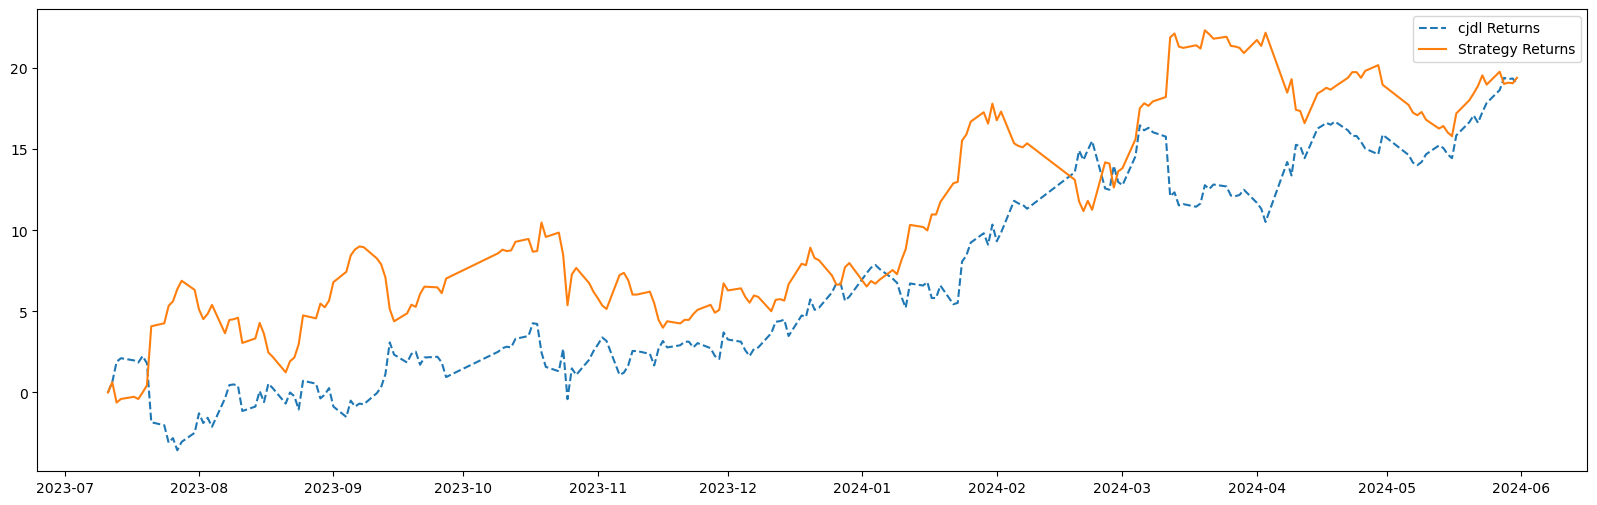

In [192]:
cum_returns = cum_return(data, split_value=len(X_train))
cum_strategy_returns = strategy_return(data, split_value=len(X_train))
plot_chart(cum_returns, cum_strategy_returns, symbol='cjdl')

In [169]:
# 构造KNN回归模型的数据集
X, y = regression_tc(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [171]:
# 使用KNN回归预测日间收盘价差值
knn_reg = KNeighborsRegressor(n_neighbors=98)
knn_reg.fit(X_train, y_train)
print(knn_reg.score(X_train, y_train))
print(knn_reg.score(X_test, y_test))

0.009842229691416349
-0.0020349695922545763


In [198]:
predict_volumn = knn_reg.predict(X)
predict_volumn = pd.DataFrame(predict_volumn, index=X.index)
data["Predict_Volumn"] = predict_volumn

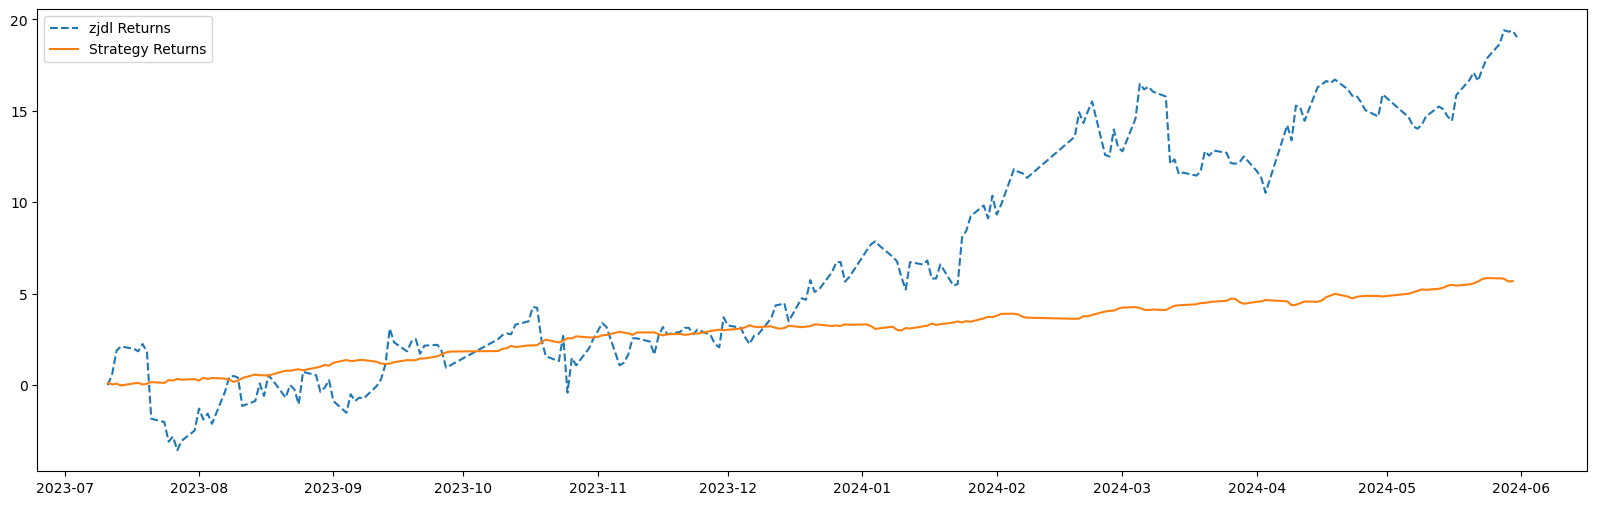

In [200]:
cum_returns = cum_return(data, split_value=len(X_train))
cum_strategy_returns = strategy_return_reg(data, split_value=len(X_train))
plot_chart(cum_returns, cum_strategy_returns, 'zjdl')

In [205]:
print("total change volumn in prediction: {}".format(data[len(X_train):]["Predict_Volumn"].sum()))
print("total changed volumn in reality: {}".format(data["Close"].iloc[-1] - data["Close"].iloc[len(X_train)]))

total change volumn in prediction: 1.3255076116445113
total changed volumn in reality: 4.6100006103515625


In [1]:
data

NameError: name 'data' is not defined